In [5]:
import json
import pandas as pd

In [ ]:
def convert_bank_data_to_dataframe(json_file_path):
    # Charger le fichier JSON
    with open(json_file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)  

    # Liste pour stocker les données transformées
    transformed_data = []

    # Parcourir chaque élément dans la liste principale
    for item in data:
        # Accéder à la liste "places" dans chaque élément
        places = item.get('places', [])

        # Parcourir chaque lieu (banque) dans la liste "places"
        for place in places:
            # Vérifier si place n'est pas vide
            if not place:
                continue

            # Extraire les informations
            display_name = place.get('displayName', {}).get('text', '')
            location = place.get('shortFormattedAddress', '')
            rating = place.get('rating', 0)

            # Définir bank_name comme les deux premiers mots de display_name s'ils existent
            bank_name = ""
            if display_name:
                parts = display_name.split(' ')
                if len(parts) > 1:
                    bank_name = ' '.join(parts[:5])
                else:
                    bank_name = display_name

            # Créer branch_name comme concaténation de display_name et location
            branch_name = f"{display_name} - {location}".strip()

            # Parcourir chaque avis pour cette banque
            reviews = place.get('reviews', [])
            for review in reviews:
                review_text = review.get('text', {}).get('text', '')
                original_text = review.get('originalText', {}).get('text', '')
                review_rating = review.get('rating', 0)
                date = review.get('publishTime', '')

                # Créer une entrée pour cet avis
                entry = {
                    "bank_name": bank_name,
                    "branch_name": branch_name,
                    "location": location,
                    "review": review_text,
                    "rating": review_rating,
                    "review_original": original_text,
                    "date": date
                }

                transformed_data.append(entry)

    # Créer un DataFrame à partir des données transformées
    df = pd.DataFrame(transformed_data)

    return df


In [67]:
# Utilisation de la fonction
file_path = '/Users/mac/Documents/S4 et S3 de INSEA /projet_data_Warehouse/fichier_combine.json'  # Remplacez par le chemin de votre fichier
try:
    df = convert_bank_data_to_dataframe(file_path)

    # Afficher les premières lignes du DataFrame
    if not df.empty:
        print(df.head())

        # Sauvegarder le DataFrame en CSV si nécessaire
       # df.to_csv('banques_reviews.csv', index=False)
    else:
        print("Aucune donnée n'a été extraite. Vérifiez la structure de votre fichier JSON.")

    # Afficher la taille du DataFrame
    print(f"Nombre total d'avis extraits : {len(df)}")

except Exception as e:
    print(f"Une erreur s'est produite: {e}")
    print("Affichage de la structure du JSON pour débogage:")
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        print(f"Type de data: {type(data)}")
        if isinstance(data, list):
            print(f"Nombre d'éléments dans la liste: {len(data)}")
            if len(data) > 0:
                print(f"Type du premier élément: {type(data[0])}")
                if isinstance(data[0], dict):
                    print(f"Clés du premier élément: {list(data[0].keys())}")

              bank_name                                        branch_name  \
0  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
1  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
2  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
3  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
4  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   

                                            location  \
0  et rue Charkaoua, Angle Place Moujahidine, Kho...   
1  et rue Charkaoua, Angle Place Moujahidine, Kho...   
2  et rue Charkaoua, Angle Place Moujahidine, Kho...   
3  et rue Charkaoua, Angle Place Moujahidine, Kho...   
4  et rue Charkaoua, Angle Place Moujahidine, Kho...   

                                              review  rating  \
0  The first and last time we entered this branch...       1   
1  Warm welcome, competent, responsive and attent...       5   
2 

In [8]:
df.head(10)

,bank_name,branch_name,location,review,rating,review_original,date
0,Umnia Bank,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...",The first and last time we entered this branch...,1,اول واخر مرة ندخل لهاد الفرع تاع خريبكة تجربة ...,2024-07-26T19:39:39.949310Z
1,Umnia Bank,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...","Warm welcome, competent, responsive and attent...",5,"Accueil chaleureux, personnels compétents, réa...",2022-08-01T09:50:02.282897Z
2,Umnia Bank,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...","They are good, but there are still things to do",4,"Ils sont bien, mais il reste des choses à faire",2023-06-20T15:24:55.458144Z
3,Umnia Bank,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...",May God's peace and mercy be upon you\nThe bod...,5,السلام عليكم ورحمة الله\nالتشافي الذاتي للجسم ...,2021-06-16T09:05:33.748921Z
4,Umnia Bank,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...",Great,5,Super,2021-06-12T20:33:57.273418Z
5,Banque populaire,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",Good,5,Bonne,2024-06-08T19:40:55.546864Z
6,Banque populaire,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",,5,,2024-07-30T12:46:21.625772Z
7,Banque populaire,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",,2,,2021-08-04T21:27:40.662748Z
8,Banque populaire,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",,2,,2020-12-23T21:05:18.739174Z
9,Banque populaire,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",,1,,2017-12-25T14:48:09.498Z


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bank_name        3783 non-null   object
 1   branch_name      3783 non-null   object
 2   location         3783 non-null   object
 3   review           3783 non-null   object
 4   rating           3783 non-null   int64 
 5   review_original  3783 non-null   object
 6   date             3783 non-null   object
dtypes: int64(1), object(6)
memory usage: 207.0+ KB


In [69]:
cpt=  0
index = 0
review_na =[]
for review in df["review"] :
  if (review==''):
        review_na.append(df['rating'][index])
        cpt=cpt+1
  index +=1
# Afficher le résultat
print()
print(f"Nombre de valeurs manquantes : {cpt}")


Nombre de valeurs manquantes : 781


In [70]:
review_na = []
cpt = 0

for index, review in enumerate(df["review"]):
    if review == '':
        review_na.append((index, df['rating'][index]))
        cpt += 1

# Afficher le résultat
print(f"Nombre de valeurs manquantes : {cpt}")
print("Index et rating correspondants :", review_na)


Nombre de valeurs manquantes : 781
Index et rating correspondants : [(6, 5), (7, 2), (8, 2), (9, 1), (24, 4), (25, 1), (26, 5), (27, 3), (41, 1), (42, 4), (45, 4), (46, 3), (51, 5), (58, 5), (63, 5), (64, 5), (65, 1), (66, 5), (76, 5), (77, 2), (82, 1), (83, 5), (84, 5), (85, 3), (87, 3), (89, 3), (90, 3), (91, 3), (92, 2), (100, 4), (102, 5), (103, 5), (148, 1), (150, 5), (151, 1), (152, 4), (155, 5), (156, 1), (157, 5), (186, 5), (201, 5), (212, 4), (216, 4), (217, 5), (222, 1), (223, 5), (224, 1), (225, 1), (232, 3), (233, 1), (234, 5), (235, 5), (236, 1), (237, 2), (242, 1), (243, 4), (245, 5), (246, 2), (248, 3), (249, 1), (250, 3), (251, 5), (255, 5), (256, 3), (258, 1), (259, 5), (260, 5), (264, 5), (273, 5), (274, 5), (281, 4), (285, 5), (286, 4), (299, 1), (300, 3), (301, 4), (339, 5), (350, 1), (351, 1), (352, 4), (353, 2), (357, 5), (358, 5), (363, 1), (364, 5), (366, 5), (368, 5), (369, 5), (370, 4), (371, 1), (372, 5), (381, 4), (382, 2), (384, 1), (408, 5), (420, 1), (421

In [71]:
# Filtrer les lignes où la review est vide
empty_reviews = df[df['review'] == '']

# Créer un tableau avec l'index et le rating
resultat = list(zip(empty_reviews.index, empty_reviews['rating']))

print(resultat)

[(6, 5), (7, 2), (8, 2), (9, 1), (24, 4), (25, 1), (26, 5), (27, 3), (41, 1), (42, 4), (45, 4), (46, 3), (51, 5), (58, 5), (63, 5), (64, 5), (65, 1), (66, 5), (76, 5), (77, 2), (82, 1), (83, 5), (84, 5), (85, 3), (87, 3), (89, 3), (90, 3), (91, 3), (92, 2), (100, 4), (102, 5), (103, 5), (148, 1), (150, 5), (151, 1), (152, 4), (155, 5), (156, 1), (157, 5), (186, 5), (201, 5), (212, 4), (216, 4), (217, 5), (222, 1), (223, 5), (224, 1), (225, 1), (232, 3), (233, 1), (234, 5), (235, 5), (236, 1), (237, 2), (242, 1), (243, 4), (245, 5), (246, 2), (248, 3), (249, 1), (250, 3), (251, 5), (255, 5), (256, 3), (258, 1), (259, 5), (260, 5), (264, 5), (273, 5), (274, 5), (281, 4), (285, 5), (286, 4), (299, 1), (300, 3), (301, 4), (339, 5), (350, 1), (351, 1), (352, 4), (353, 2), (357, 5), (358, 5), (363, 1), (364, 5), (366, 5), (368, 5), (369, 5), (370, 4), (371, 1), (372, 5), (381, 4), (382, 2), (384, 1), (408, 5), (420, 1), (421, 1), (422, 5), (423, 4), (464, 5), (475, 3), (476, 3), (477, 5), (4

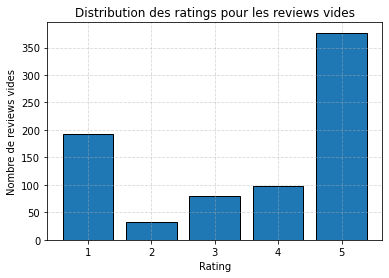

In [72]:
import matplotlib.pyplot as plt


# Extraire uniquement les ratings
ratings = [r for _, r in resultat]

# Tracer l'histogramme
plt.figure(figsize=(6, 4))
plt.hist(ratings, bins=range(1, 7), align='left', edgecolor='black', rwidth=0.8)
plt.xticks(range(1, 6))
plt.xlabel('Rating')
plt.ylabel('Nombre de reviews vides')
plt.title('Distribution des ratings pour les reviews vides')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


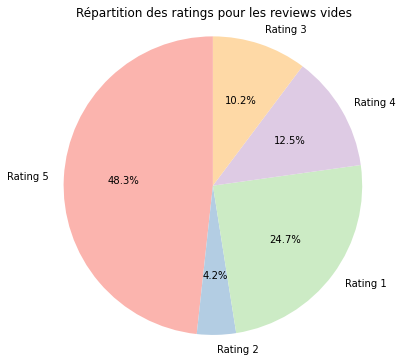

In [73]:
import matplotlib.pyplot as plt
from collections import Counter
# Extraire uniquement les ratings
ratings = [r for _, r in resultat]

# Compter la fréquence de chaque rating
count = Counter(ratings)

# Préparer les données
labels = [f'Rating {key}' for key in count.keys()]
sizes = list(count.values())

# Tracer le camembert
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Répartition des ratings pour les reviews vides')
plt.axis('equal')  # Cercle parfait
plt.show()


In [74]:
def review_empty(rating):
    if rating >= 4:
        return 'good'
    elif rating == 3:
        return 'neutral'
    else:
        return 'bad'

In [75]:

for i in range(len(resultat)):
  j = resultat[i][0]
  df['review'][j] = review_empty(df['rating'][j])
df.head(10)

/var/folders/qb/_3pyntqj4pz2dp5ylv7fsdnc0000gn/T/ipykernel_68265/804937904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][j] = review_empty(df['rating'][j])
/var/folders/qb/_3pyntqj4pz2dp5ylv7fsdnc0000gn/T/ipykernel_68265/804937904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][j] = review_empty(df['rating'][j])
/var/folders/qb/_3pyntqj4pz2dp5ylv7fsdnc0000gn/T/ipykernel_68265/804937904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

,bank_name,branch_name,location,review,rating,review_original,date
0,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...",The first and last time we entered this branch...,1,اول واخر مرة ندخل لهاد الفرع تاع خريبكة تجربة ...,2024-07-26T19:39:39.949310Z
1,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...","Warm welcome, competent, responsive and attent...",5,"Accueil chaleureux, personnels compétents, réa...",2022-08-01T09:50:02.282897Z
2,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...","They are good, but there are still things to do",4,"Ils sont bien, mais il reste des choses à faire",2023-06-20T15:24:55.458144Z
3,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...",May God's peace and mercy be upon you\nThe bod...,5,السلام عليكم ورحمة الله\nالتشافي الذاتي للجسم ...,2021-06-16T09:05:33.748921Z
4,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...",Great,5,Super,2021-06-12T20:33:57.273418Z
5,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",Good,5,Bonne,2024-06-08T19:40:55.546864Z
6,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",good,5,,2024-07-30T12:46:21.625772Z
7,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",bad,2,,2021-08-04T21:27:40.662748Z
8,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",bad,2,,2020-12-23T21:05:18.739174Z
9,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",bad,1,,2017-12-25T14:48:09.498Z


In [78]:
import pandas as pd
import re

def preprocess_for_vader(text):
    # 1. Convertir en minuscules
    text = text.lower()

    # 2. Supprimer les URLs
    text = re.sub(r'http\S+|www.\S+', '', text)

    # 3. Supprimer les caractères spéciaux inutiles (mais garder la ponctuation utile)
    text = re.sub(r'[^a-zA-Z0-9\s.,!?\'"]', '', text)

    # 4. Supprimer les espaces multiples
    text = re.sub(r'\s+', ' ', text).strip()

    return text


In [79]:
df["cleaned_review"] = df['review'].apply(preprocess_for_vader)


In [80]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [81]:
sia = SentimentIntensityAnalyzer()

In [82]:
df['sentiment_score'] = df['cleaned_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda score: 'positive' if score > 0.10 else ('negative' if score < -0.10 else 'neutral')
)

print(df[['review', 'sentiment_score', 'sentiment_label']])

                                                 review  sentiment_score  \
0     The first and last time we entered this branch...          -0.7845   
1     Warm welcome, competent, responsive and attent...           0.8653   
2       They are good, but there are still things to do           0.2382   
3     May God's peace and mercy be upon you\nThe bod...           0.8750   
4                                                 Great           0.6249   
...                                                 ...              ...   
3778                                               Nice           0.4215   
3779  Racism is present in this agency, sorry but it...          -0.5538   
3780                                      Always on top           0.2023   
3781  There is nothing wrong with it. You should go ...           0.0910   
3782      Early in the morning the place is not crowded           0.0000   

     sentiment_label  
0           negative  
1           positive  
2           positi

In [83]:
df.head(10)

,bank_name,branch_name,location,review,rating,review_original,date,cleaned_review,sentiment_score,sentiment_label
0,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...",The first and last time we entered this branch...,1,اول واخر مرة ندخل لهاد الفرع تاع خريبكة تجربة ...,2024-07-26T19:39:39.949310Z,the first and last time we entered this branch...,-0.7845,negative
1,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...","Warm welcome, competent, responsive and attent...",5,"Accueil chaleureux, personnels compétents, réa...",2022-08-01T09:50:02.282897Z,"warm welcome, competent, responsive and attent...",0.8653,positive
2,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...","They are good, but there are still things to do",4,"Ils sont bien, mais il reste des choses à faire",2023-06-20T15:24:55.458144Z,"they are good, but there are still things to do",0.2382,positive
3,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...",May God's peace and mercy be upon you\nThe bod...,5,السلام عليكم ورحمة الله\nالتشافي الذاتي للجسم ...,2021-06-16T09:05:33.748921Z,may god's peace and mercy be upon you the body...,0.8750,positive
4,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...",Great,5,Super,2021-06-12T20:33:57.273418Z,great,0.6249,positive
5,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",Good,5,Bonne,2024-06-08T19:40:55.546864Z,good,0.4404,positive
6,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",good,5,,2024-07-30T12:46:21.625772Z,good,0.4404,positive
7,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",bad,2,,2021-08-04T21:27:40.662748Z,bad,-0.5423,negative
8,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",bad,2,,2020-12-23T21:05:18.739174Z,bad,-0.5423,negative
9,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",bad,1,,2017-12-25T14:48:09.498Z,bad,-0.5423,negative


In [84]:
import nltk
>>> nltk.download('stopwords')
>>> nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

In [86]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /Users/mac/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [87]:
L =["Hello, i have 3 books.", "the book not in the table"]

In [90]:
def preprocess_corpus(texts):
    mystopwords = set(stopwords.words("english"))

    def remove_stops_digits(tokens):
        return [token.lower() for token in tokens if token not in mystopwords
                and token not in punctuation and not re.search(r'\d', token)]
    cleaned_dict= []
    for text in L:
        tokens = word_tokenize(text)
        cleaned_tokens = remove_stops_digits(tokens)
        cleaned_dict.append(cleaned_tokens)   # Conserver l'ID et les tokens nettoyés

    return cleaned_dict

In [91]:
preprocessed_texts = preprocess_corpus(L)

print(preprocessed_texts)

[['hello', 'books'], ['book', 'table']]


In [92]:
# Sélectionner les colonnes souhaitées
columns_to_save = ['bank_name', 'branch_name', 'location','review', 'rating','date','sentiment_label']

# Créer un nouveau DataFrame avec les colonnes sélectionnées
df_to_save = df[columns_to_save]

# Sauvegarder en CSV
#df_to_save.to_csv('bank_reviews_analysis.csv', index=False, encoding='utf-8')

# Afficher les premières lignes pour vérification
print("Aperçu du fichier sauvegardé:")
print(df_to_save.head())

Aperçu du fichier sauvegardé:
              bank_name                                        branch_name  \
0  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
1  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
2  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
3  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
4  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   

                                            location  \
0  et rue Charkaoua, Angle Place Moujahidine, Kho...   
1  et rue Charkaoua, Angle Place Moujahidine, Kho...   
2  et rue Charkaoua, Angle Place Moujahidine, Kho...   
3  et rue Charkaoua, Angle Place Moujahidine, Kho...   
4  et rue Charkaoua, Angle Place Moujahidine, Kho...   

                                              review  rating  \
0  The first and last time we entered this branch...       1   
1  Warm welcome, competent, responsi

In [93]:
df.tail(10)

,bank_name,branch_name,location,review,rating,review_original,date,cleaned_review,sentiment_score,sentiment_label
3773,Banque Populaire,Banque Populaire - 5Q6W+M9W، الطريق الوطنية رق...,"5Q6W+M9W، الطريق الوطنية رقم 1, El-Aaiún",It is beautiful and I cannot describe it with ...,5,إنه جميل أناىلايمكنني وصفه بأي وصف لانه بيوةفول,2019-12-21T16:28:03.819757Z,it is beautiful and i cannot describe it with ...,0.8316,positive
3774,Banque Populaire,Banque Populaire - 5Q6W+M9W، الطريق الوطنية رق...,"5Q6W+M9W، الطريق الوطنية رقم 1, El-Aaiún",Very good,4,جيد جداا,2024-02-25T19:32:55.047138Z,very good,0.4927,positive
3775,Banque Populaire,Banque Populaire - 5Q6W+M9W، الطريق الوطنية رق...,"5Q6W+M9W، الطريق الوطنية رقم 1, El-Aaiún",beauty,4,شيء جميل,2017-12-18T18:14:16.494Z,beauty,0.5859,positive
3776,Banque Populaire,Banque Populaire - 5Q6W+M9W، الطريق الوطنية رق...,"5Q6W+M9W، الطريق الوطنية رقم 1, El-Aaiún",Wow,5,Waw,2020-06-10T16:24:01.047820Z,wow,0.5859,positive
3777,Banque Populaire,Banque Populaire - 5Q6W+M9W، الطريق الوطنية رق...,"5Q6W+M9W، الطريق الوطنية رقم 1, El-Aaiún",bad,1,,2020-01-20T19:51:40.646521Z,bad,-0.5423,negative
3778,Banque populaire,"Banque populaire - 5Q3X+WCV, Laayoune","5Q3X+WCV, Laayoune",Nice,3,Nice,2014-03-10T20:56:21.855276Z,nice,0.4215,positive
3779,Banque populaire,"Banque populaire - 5Q3X+WCV, Laayoune","5Q3X+WCV, Laayoune","Racism is present in this agency, sorry but it...",1,"Le Racisme est présent dans cette agence, déso...",2024-01-10T17:20:50.709847Z,"racism is present in this agency, sorry but it...",-0.5538,negative
3780,Banque populaire,"Banque populaire - 5Q3X+WCV, Laayoune","5Q3X+WCV, Laayoune",Always on top,5,Toujours au top,2022-10-27T16:02:38.817319Z,always on top,0.2023,positive
3781,Banque populaire,"Banque populaire - 5Q3X+WCV, Laayoune","5Q3X+WCV, Laayoune",There is nothing wrong with it. You should go ...,3,لابأس به يجب الذهاب باكرا إلى هذا المكان وتفاد...,2019-12-22T05:44:25.567328Z,there is nothing wrong with it. you should go ...,0.0910,neutral
3782,Banque populaire,"Banque populaire - 5Q3X+WCV, Laayoune","5Q3X+WCV, Laayoune",Early in the morning the place is not crowded,2,في الصباح الباكر لا يكون المكان مزدحم,2023-10-26T11:01:33.935056Z,early in the morning the place is not crowded,0.0000,neutral


In [31]:
!pip install gensim spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 883.8 kB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [94]:
import pandas as pd
import gensim
from gensim import corpora
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Prétraitement pour topic modeling
def preprocess(text):
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

# Tokenisation
df['tokens'] = df['review'].apply(preprocess)

# Créer dictionnaire et corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Modèle LDA
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=dictionary,
                                   num_topics=6,
                                   random_state=42,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)

# Affichage des topics
topics = lda_model.print_topics(num_words=5)
for i, topic in topics:
    print(f"Topic #{i}: {topic}")

Topic #0: 0.025*"neutral" + 0.015*"wait" + 0.015*"great" + 0.014*"work" + 0.012*"time"
Topic #1: 0.076*"bank" + 0.019*"agency" + 0.019*"money" + 0.012*"atm" + 0.012*"account"
Topic #2: 0.093*"service" + 0.066*"bad" + 0.034*"customer" + 0.028*"bank" + 0.023*"agency"
Topic #3: 0.028*"account" + 0.018*"agency" + 0.014*"bank" + 0.012*"open" + 0.011*"customer"
Topic #4: 0.034*"agency" + 0.033*"phone" + 0.028*"answer" + 0.018*"bank" + 0.014*"people"
Topic #5: 0.273*"good" + 0.040*"service" + 0.014*"nice" + 0.012*"place" + 0.006*"wow"


In [33]:
!pip install pyLDAvis

In [95]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
pyLDAvis.enable_notebook()

# Créer la visualisation
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Affichage dans le notebook
lda_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.077778 -0.168587       1        1  32.812851
1      0.089440  0.043730       2        1  18.717761
3      0.076812  0.038276       3        1  17.966385
4      0.076465 -0.019732       4        1  14.713829
5     -0.299431 -0.035957       5        1   8.087113
0     -0.021063  0.142270       6        1   7.702060, topic_info=             Term         Freq        Total Category  logprob  loglift
19           good   696.000000   696.000000  Default  30.0000  30.0000
0             bad   685.000000   685.000000  Default  29.0000  29.0000
15        service  1178.000000  1178.000000  Default  28.0000  28.0000
116          bank   919.000000   919.000000  Default  27.0000  27.0000
333         phone   180.000000   180.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
103        office     9.537548    52.979513   Topic6  -5.5368   0.8490
943      friendly     9.293985    45.860738   Topic6  -5.5627   0.9674
133          open    10.319093   133.543658   Topic6  -5.4581   0.0032
175  professional     9.000163    81.303077   Topic6  -5.5948   0.3627
48       customer     9.096699   541.490043   Topic6  -5.5841  -1.5227

[432 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
194       3  0.952738   abroad
36        1  0.188727  account
36        2  0.250492  account
36        3  0.552455  account
36        6  0.006863  account
...     ...       ...      ...
947       5  0.972479      wow
249       1  0.725468     zero
249       4  0.128972     zero
249       5  0.016122     zero
249       6  0.112851     zero

[832 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 5, 6, 1])

In [96]:
def get_dominant_topic(lda_model, corpus):
    topics = []
    for i, row in enumerate(lda_model[corpus]):
        row = sorted(row[0], key=lambda x: x[1], reverse=True)
        dominant_topic = row[0][0]
        topics.append(dominant_topic)
    return topics

df['dominant_topic'] = get_dominant_topic(lda_model, corpus)
print(df[['review', 'dominant_topic']])

                                                 review  dominant_topic
0     The first and last time we entered this branch...               2
1     Warm welcome, competent, responsive and attent...               4
2       They are good, but there are still things to do               5
3     May God's peace and mercy be upon you\nThe bod...               5
4                                                 Great               0
...                                                 ...             ...
3778                                               Nice               5
3779  Racism is present in this agency, sorry but it...               2
3780                                      Always on top               2
3781  There is nothing wrong with it. You should go ...               1
3782      Early in the morning the place is not crowded               5

[3783 rows x 2 columns]


In [97]:
# Dictionnaire de mapping : index → nom du topic
topic_names = {
    0: "Temps d'attente et expérience générale",
    1: "Opérations bancaires et accès aux services",
    2: "Service client négatif",
    3: "Ouverture de compte en agence",
    4: "Problèmes de communication (appels non répondus)",
    5: "Avis positifs et satisfaction client"
}

# Remplacer les valeurs dans la colonne ⁠ dominant_topic ⁠
df['dominant_topic'] = df['dominant_topic'].map(topic_names)

In [98]:
print(df[['dominant_topic']])

                                        dominant_topic
0                               Service client négatif
1     Problèmes de communication (appels non répondus)
2                 Avis positifs et satisfaction client
3                 Avis positifs et satisfaction client
4               Temps d'attente et expérience générale
...                                                ...
3778              Avis positifs et satisfaction client
3779                            Service client négatif
3780                            Service client négatif
3781        Opérations bancaires et accès aux services
3782              Avis positifs et satisfaction client

[3783 rows x 1 columns]


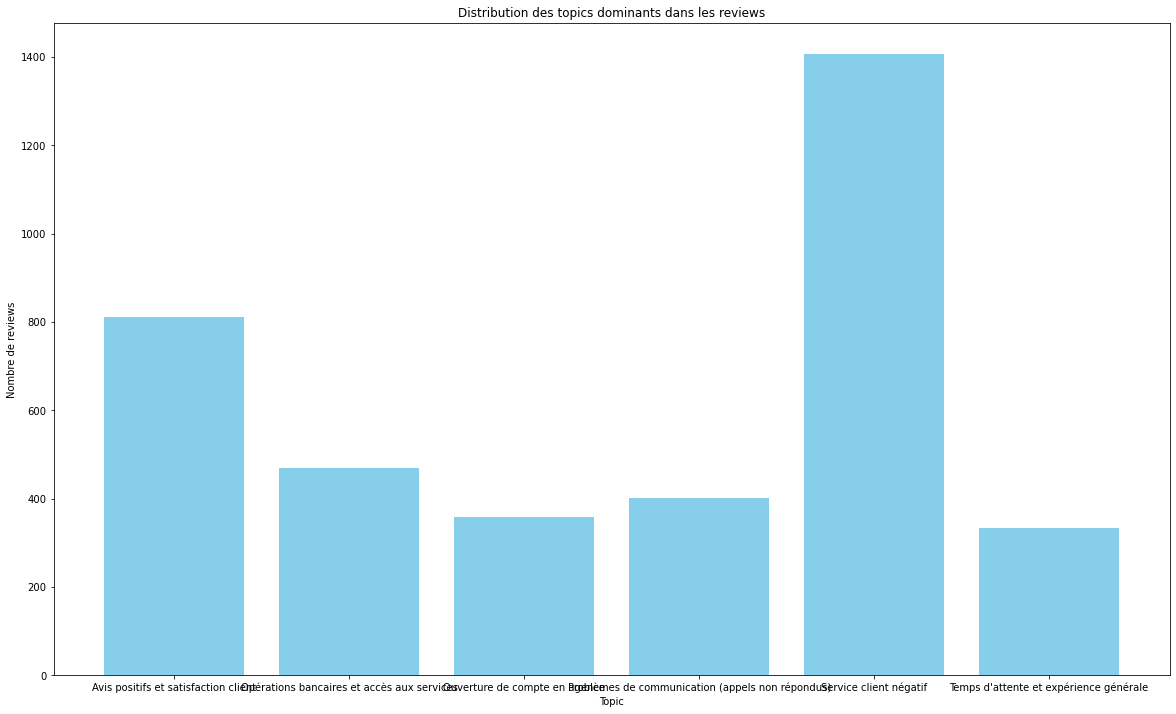

In [99]:
import matplotlib.pyplot as plt

# Compter les occurrences de chaque topic
topic_counts = df['dominant_topic'].value_counts().sort_index()

# Tracer l'histogramme
plt.figure(figsize=(20, 12))
plt.bar(topic_counts.index, topic_counts.values, color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Nombre de reviews')
plt.title('Distribution des topics dominants dans les reviews')
plt.xticks(topic_counts.index)
plt.show()

In [39]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


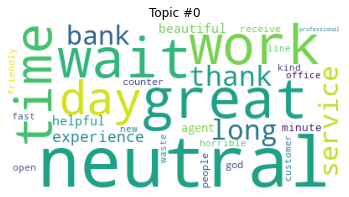

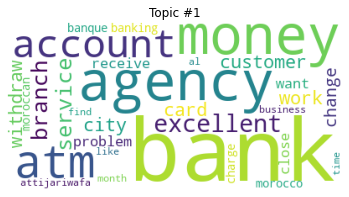

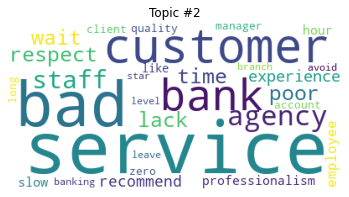

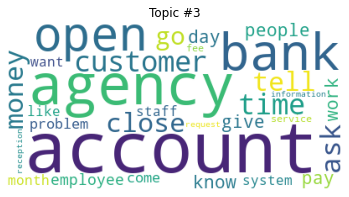

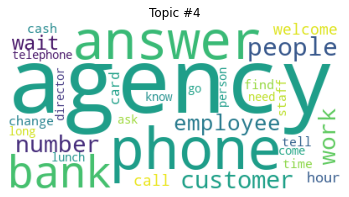

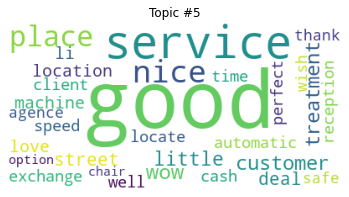

In [100]:
from wordcloud import WordCloud

# Pour chaque topic, générer un nuage de mots
for t in range(lda_model.num_topics):
    plt.figure(figsize=(6, 4))
    plt.imshow(WordCloud(background_color='white').fit_words(dict(lda_model.show_topic(t, 30))))
    plt.axis('off')
    plt.title(f"Topic #{t}")
    plt.show()

In [116]:
columns_to_save = ['bank_name', 'branch_name', 'location','review', 'rating','date','sentiment_label','dominant_topic']

# Créer un nouveau DataFrame avec les colonnes sélectionnées
df_to_save = df[columns_to_save]

# Sauvegarder en CSV
#df_to_save.to_csv('bank_reviews_analysis.csv', index=False, encoding='utf-8')

# Afficher les premières lignes pour vérification
print("Aperçu du fichier sauvegardé:")
print(df_to_save.head())

Aperçu du fichier sauvegardé:
              bank_name                                        branch_name  \
0  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
1  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
2  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
3  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
4  Umnia Bank Khouribga  Umnia Bank Khouribga - et rue Charkaoua, Angle...   

                                            location  \
0  et rue Charkaoua, Angle Place Moujahidine, Kho...   
1  et rue Charkaoua, Angle Place Moujahidine, Kho...   
2  et rue Charkaoua, Angle Place Moujahidine, Kho...   
3  et rue Charkaoua, Angle Place Moujahidine, Kho...   
4  et rue Charkaoua, Angle Place Moujahidine, Kho...   

                                              review  rating  \
0  The first and last time we entered this branch...       1   
1  Warm welcome, competent, responsi

In [102]:
df_to_save.info()
df_to_save.describe()
df_to_save.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bank_name        3783 non-null   object
 1   branch_name      3783 non-null   object
 2   location         3783 non-null   object
 3   review           3783 non-null   object
 4   rating           3783 non-null   int64 
 5   date             3783 non-null   object
 6   sentiment_label  3783 non-null   object
 7   dominant_topic   3783 non-null   object
dtypes: int64(1), object(7)
memory usage: 236.6+ KB


,bank_name,branch_name,location,review,rating,date,sentiment_label,dominant_topic
0,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...",The first and last time we entered this branch...,1,2024-07-26T19:39:39.949310Z,negative,Service client négatif
1,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...","Warm welcome, competent, responsive and attent...",5,2022-08-01T09:50:02.282897Z,positive,Problèmes de communication (appels non répondus)
2,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...","They are good, but there are still things to do",4,2023-06-20T15:24:55.458144Z,positive,Avis positifs et satisfaction client
3,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...",May God's peace and mercy be upon you\nThe bod...,5,2021-06-16T09:05:33.748921Z,positive,Avis positifs et satisfaction client
4,Umnia Bank Khouribga,"Umnia Bank Khouribga - et rue Charkaoua, Angle...","et rue Charkaoua, Angle Place Moujahidine, Kho...",Great,5,2021-06-12T20:33:57.273418Z,positive,Temps d'attente et expérience générale
5,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",Good,5,2024-06-08T19:40:55.546864Z,positive,Avis positifs et satisfaction client
6,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",good,5,2024-07-30T12:46:21.625772Z,positive,Avis positifs et satisfaction client
7,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",bad,2,2021-08-04T21:27:40.662748Z,negative,Service client négatif
8,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",bad,2,2020-12-23T21:05:18.739174Z,negative,Service client négatif
9,Banque populaire Agence Qods,"Banque populaire Agence Qods - V3Q8+6M9, Bd Ab...","V3Q8+6M9, Bd Abderrahim Bouabid, Khouribga",bad,1,2017-12-25T14:48:09.498Z,negative,Service client négatif


In [43]:
print(df_to_save)

             bank_name                                        branch_name  \
0           Umnia Bank  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
1           Umnia Bank  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
2           Umnia Bank  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
3           Umnia Bank  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
4           Umnia Bank  Umnia Bank Khouribga - et rue Charkaoua, Angle...   
...                ...                                                ...   
3778  Banque populaire              Banque populaire - 5Q3X+WCV, Laayoune   
3779  Banque populaire              Banque populaire - 5Q3X+WCV, Laayoune   
3780  Banque populaire              Banque populaire - 5Q3X+WCV, Laayoune   
3781  Banque populaire              Banque populaire - 5Q3X+WCV, Laayoune   
3782  Banque populaire              Banque populaire - 5Q3X+WCV, Laayoune   

                                               location  \
0     et rue Cha

In [103]:
print("Noms de banques uniques après standardisation:")
print(df_to_save['bank_name'].unique())

Noms de banques uniques après standardisation:
['Umnia Bank Khouribga' 'Banque populaire Agence Qods' 'Attijariwafa Bank'
 'Banque Populaire' 'Groupe Banque Populaire - Agence' 'AttijariWafa bank'
 'Banque CIH' 'CIH BANK' 'BMCE' 'Banque BMCE' 'BMCI Bank' 'BMCI'
 'CREDIT AGRICOLE' 'Bank of Africa' 'Cashplus Lamnara' 'Umnia Bank Azrou'
 'Crédit du Maroc' 'Crédit agricole' 'الشعبي كاش بن دحمان chaabi'
 'Chaabi Cash' 'Bank Assafa' 'Bank populaire'
 'Banque Populaire Ibn Tofail' 'Banque populaire' 'The Public Company'
 'Banque populaire moulay ismail' 'du Maroc - Agence Marrakech'
 'Banque Populaire Agency door Gmat' 'Attijariwafa bank' 'Bank'
 'Bank Al Yousr' 'Bank chaabi - البنك الشعبي' 'Albank Chaabi'
 'SOFAC CREDIT' 'البنك المغربي للتجارة الخارجية' 'Cash Plus' 'Barid Cash'
 'Al Barid Bank' 'Bank AL YOUSR بنك اليسر'
 'Crédit agricole agence ain asserdoun' 'La Banque Populaire'
 'Damane Cash' 'Bmce Bank' 'Banque Populaire Agence Moulay el'
 'Martil Exchange' 'Crédit Agricoleالقرض الفلاحي'

In [125]:
import re
import pandas as pd

class BankNameStandardizer:
    def __init__(self):
        # Définir les patterns de base pour chaque banque
        self.bank_patterns = {
            'BANQUE POPULAIRE': [
                r'(?i)banqu?e?\s*populaire',
                r'(?i)bank\s*populaire',
                r'(?i)chaabi\s*(?:bank|cash)',
                r'(?i)banqu?e?\s*chae?bi',
                r'(?i)الشعبي\s*كاش',
                r'(?i)البنك\s*الشعبي',
                r'(?i)people\'?s\s*bank',
                r'(?i)banque\s*populaire\s*du\s*maroc',
                r'(?i)banque\s*populaire\s*marocaine',
                r'(?i)banqie\s*populaire',
                r'(?i)al\s*bank\s*chaabi',
                r'(?i)banque\s*chaabi.*'
                
            ],
            'BANQUE ASSAFA': [ 
                r'(?i)bank\s*assafa',
                r'(?i)banque\s*assafa',
                r'(?i)assafa\s*bank',
                r'(?i)assafa\s*banque',
                r'(?i)assafa\s*bank\s*maroc',
                r'(?i)assafa\s*bank\s*du\s*maroc'
            ],
            'BANK AL MAGHRIB': [
                r'(?i)bank\s*al\s*maghrib',
                r'(?i)bank\s*of\s*morocco', 
                r'(?i)banque\s*al\s*maghrib', 
                r'(?i)بنك\s*المغرب'
            ],

            'ATTIJARIWAFA BANK': [
                r'(?i)attijari(?:wafa)?\s*bank(?:ue)?',
                r'(?i)wafa\s*bank(?:ue)?',
                r'(?i)agence\s*(?:attijari|wafabank)',
                r'(?i)التجاري\s*وفا',
                r'(?i)atijari\s*wafabank',
                r'(?i)^attijariwafa(?:\s*banque)?$',
                r'(?i)wafa\s*(?:cash|banque)?'
            ],
            'CIH BANK': [
                r'(?i)cih\s*(?:bank|banque|marrakech|kenitra)?',
                r'(?i)banque\s*cih',
                r'(?i)credit\s*immobilier',
                r'(?i)guichet\s*cih'
            ],
            'BANK OF AFRICA': [
                r'(?i)bmce(?:\s*bank|\s*kortoba|\s*r\'cif|\s*bouznika)?',
                r'(?i)bank\s*of\s*africa',
                r'(?i)banque\s*bmce',
                r'(?i)بنك\s*أفريقيا'
            ],
            'CREDIT AGRICOLE DU MAROC': [
                r'(?i)cr[ée]dit\s*agricol[e]?',
                r'(?i)القرض\s*الفلاحي',
                r'(?i)agricultural\s*loan'
            ],
            'SOCIETE GENERALE': [
                r'(?i)soci[ée]t[ée]\s*g[ée]n[ée]ral[e]?',
                r'(?i)sgmb',
                r'(?i)الشركة\s*العامة',
                r'(?i)بنك\s*الشركة'
            ],
            'AL BARID BANK': [
                r'(?i)(?:al\s*)?barid\s*(?:bank|cash|banque)',
                r'(?i)بريد\s*المغرب',
                r'(?i)البريد\s*بنك'
            ],
            'UMNIA BANK': [
                r'(?i)umnia(?:\s*bank)?'
            ],
            'BMCI': [
                r'(?i)bmci(?:\s*bank|\s*far)?',
                r'(?i)agence\s*bmci'
            ],
            'CFG BANK': [
                r'(?i)cfg\s*(?:bank|banque)?'
            ],
            'CREDIT DU MAROC': [
                r'(?i)cr[ée]dit\s+du\s+maroc'
            ],
            'BANK AL YOUSR': [
                r'(?i)bank\s*al\s*yousr',
                r'(?i)بنك\s*اليسر'
            ],
            'AL AKHDAR BANK': [
                r'(?i)al\s*akhdar\s*bank',
                r'(?i)البنك\s*الأخضر'
            ],
            'BTI BANK': [
                r'(?i)bti\s*bank'
            ],
            'CDG CAPITAL': [
                r'(?i)cdg\s*capital'
            ],
            'DAR ASSAFAA': [
                r'(?i)dar\s*assafaa',
                r'(?i)دار\s*الصفاء'
            ],
            'CASH PLUS': [
                r'(?i)cash\s*plus',
                r'(?i)كاش\s*بلس',
                r'(?i)^cash\s*plus.*'
            ],
            'Services de transfert d\'argent': [
                r'(?i)money\s*transfers',
                r'(?i)transfert\s*d\'argent',
                r'(?i)تحويلات\s*مالية',
                r'(?i)تحويلات\s*نقدية',r'(?i)brinks',
                  r'(?i)western\s*union', 
                  r'(?i)moneygram'
            ],
            'SOFAC CRÉDIT': [
                r'(?i)sofac\s*crédit',
                r'(?i)sofac\s*finance',
                r'(?i)sofac\s*maroc',
                r'(?i)sofac\s*bank',
                r'(?i)sofac\s*cr[ée]dit'
            ],
            'SOCIÉTÉ DE CRÉDIT VIVALIS': [
                r'(?i)vivalis\s*crédit',
                r'(?i)crédit\s*vivalis',
                r'(?i)crédit\s*maroc',
                r'(?i)crédit\s*personnel',
                r'(?i)vivalis'
            ],
            'Bureau de Change': [
                r'(?i)bureau\s*de\s*change',
                r'(?i)change\s*bureau',
                r'(?i)تغيير\s*العملات',
                r'(?i)تبديل\s*العملات',
                r'(?i)(change|currency)\s*exchange'
            ],
            'DAMANE CASH': [
                r'(?i)damane\s*cash',
                r'(?i)damane\s*banque',
                r'(?i)damane\s*services',
                r'(?i)damane\s*maroc',
                r'(?i)^damane\s*cash.*'
            ],
        }
        
    def standardize_bank_name(self, bank_name):
        if not isinstance(bank_name, str):
            return bank_name
            
        # Nettoyer le nom
        cleaned_name = bank_name.strip()
        
        # Chercher une correspondance dans les patterns
        for standard_name, patterns in self.bank_patterns.items():
            for pattern in patterns:
                if re.search(pattern, cleaned_name):
                    return standard_name
                    
        # Si aucune correspondance n'est trouvée
        # Extraire le nom de base de la banque (premiers mots avant ville/localisation)
        base_name = re.split(r'\s*[-–—]\s*|\s+(?:agence|branch|succursale)', cleaned_name)[0]
        return base_name.strip().title()

    def process_dataframe(self, df, bank_column='bank_name'):
        """Standardise les noms de banques dans un DataFrame"""
        df[bank_column] = df[bank_column].apply(self.standardize_bank_name)
        return df

In [126]:
# Créer une nouvelle cellule dans votre notebook


# Initialiser le standardiseur
standardizer = BankNameStandardizer()

# Appliquer la standardisation
df_standardized = standardizer.process_dataframe(df_to_save.copy())

# Vérifier les résultats
print("Noms de banques uniques après standardisation:")
print(df_standardized['bank_name'].unique())

# Afficher la distribution
print("\nDistribution des banques après standardisation:")
print(df_standardized['bank_name'].value_counts())

# Mettre à jour branch_name si nécessaire
df_standardized['branch_name'] = df_standardized.apply(
    lambda row: f"{row['bank_name']} - {row['location']}", 
    axis=1
)

# Sauvegarder les résultats
#df_standardized.to_csv('bank_reviews_standardized.csv', index=False)
df_standardized

Noms de banques uniques après standardisation:
['UMNIA BANK' 'BANQUE POPULAIRE' 'ATTIJARIWAFA BANK' 'CIH BANK'
 'BANK OF AFRICA' 'BMCI' 'CREDIT AGRICOLE DU MAROC' 'CASH PLUS'
 'CREDIT DU MAROC' 'BANQUE ASSAFA' 'The Public Company' 'Du Maroc' 'Bank'
 'BANK AL YOUSR' 'SOFAC CRÉDIT' 'BANK AL MAGHRIB' 'AL BARID BANK'
 'DAMANE CASH' 'Martil Exchange' 'SOCIETE GENERALE' 'Aryada Change'
 'Axa Crédit' 'نجار بني ملال' "Services de transfert d'argent"
 'Bureau de Change' 'CFG BANK' 'Poste Maroc' 'Al Amana Microfinance'
 'مدار المسيرة' 'Arab Bank Plc' 'Siège C' 'La Banque Mondiale'
 'SOCIÉTÉ DE CRÉDIT VIVALIS' 'Bank Al' 'Branche Oujda Habouss' 'Tgr'
 'Barid Al Maghrib' 'Agence Srm' 'Super Change'
 'Ghorghiz Cerame Succursale (Agence Kenitra)'
 'Siege Regional De La Banque' 'Espace Participatif Arreda Oujda الفضاء'
 'Badr Rafiki' 'El Jadida Cash' 'Canal M Berrechid'
 'Umb الاتحاد المغربي للابناك' 'Alma Change صرف العملات'
 'Attawfiq Micro Finance' 'Banque Centrale Populaire' 'Banque Umb'
 'Siège R

,bank_name,branch_name,location,review,rating,date,sentiment_label,dominant_topic
0,UMNIA BANK,"UMNIA BANK - et rue Charkaoua, Angle Place Mou...","et rue Charkaoua, Angle Place Moujahidine, Kho...",The first and last time we entered this branch...,1,2024-07-26T19:39:39.949310Z,negative,Service client négatif
1,UMNIA BANK,"UMNIA BANK - et rue Charkaoua, Angle Place Mou...","et rue Charkaoua, Angle Place Moujahidine, Kho...","Warm welcome, competent, responsive and attent...",5,2022-08-01T09:50:02.282897Z,positive,Problèmes de communication (appels non répondus)
2,UMNIA BANK,"UMNIA BANK - et rue Charkaoua, Angle Place Mou...","et rue Charkaoua, Angle Place Moujahidine, Kho...","They are good, but there are still things to do",4,2023-06-20T15:24:55.458144Z,positive,Avis positifs et satisfaction client
3,UMNIA BANK,"UMNIA BANK - et rue Charkaoua, Angle Place Mou...","et rue Charkaoua, Angle Place Moujahidine, Kho...",May God's peace and mercy be upon you\nThe bod...,5,2021-06-16T09:05:33.748921Z,positive,Avis positifs et satisfaction client
4,UMNIA BANK,"UMNIA BANK - et rue Charkaoua, Angle Place Mou...","et rue Charkaoua, Angle Place Moujahidine, Kho...",Great,5,2021-06-12T20:33:57.273418Z,positive,Temps d'attente et expérience générale
...,...,...,...,...,...,...,...,...
3778,BANQUE POPULAIRE,"BANQUE POPULAIRE - 5Q3X+WCV, Laayoune","5Q3X+WCV, Laayoune",Nice,3,2014-03-10T20:56:21.855276Z,positive,Avis positifs et satisfaction client
3779,BANQUE POPULAIRE,"BANQUE POPULAIRE - 5Q3X+WCV, Laayoune","5Q3X+WCV, Laayoune","Racism is present in this agency, sorry but it...",1,2024-01-10T17:20:50.709847Z,negative,Service client négatif
3780,BANQUE POPULAIRE,"BANQUE POPULAIRE - 5Q3X+WCV, Laayoune","5Q3X+WCV, Laayoune",Always on top,5,2022-10-27T16:02:38.817319Z,positive,Service client négatif
3781,BANQUE POPULAIRE,"BANQUE POPULAIRE - 5Q3X+WCV, Laayoune","5Q3X+WCV, Laayoune",There is nothing wrong with it. You should go ...,3,2019-12-22T05:44:25.567328Z,neutral,Opérations bancaires et accès aux services


In [127]:
distinct_banks = (df_standardized['bank_name']
                 .str.upper()                  # Équivalent à UPPER()
                 .str.strip() 
                                # Équivalent à TRIM()
                 .unique())                    # Équivalent à DISTINCT
print("Noms de banques distincts après standardisation:")
bank_mapping = pd.DataFrame({
    'bank_name': distinct_banks
}).sort_values('bank_name').reset_index(drop=True)
print(bank_mapping['bank_name'].unique())
bank_mapping


Noms de banques distincts après standardisation:
['AGENCE SRM' 'AL AKHDAR BANK' 'AL AMANA MICROFINANCE' 'AL BARID BANK'
 'ALMA CHANGE صرف العملات' 'ARAB BANK PLC' 'ARYADA CHANGE'
 'ATTAWFIQ MICRO FINANCE' 'ATTIJARIWAFA BANK' 'AXA CRÉDIT' 'B'
 'BADR RAFIKI' 'BANK' 'BANK AL' 'BANK AL KARAM'
 'BANK AL KARAM_SIÈGE SOCIAL' 'BANK AL MAGHRIB' 'BANK AL YOUSR'
 'BANK OF AFRICA' 'BANQUE ASSAFA' 'BANQUE CENTRALE POPULAIRE'
 'BANQUE POPULAIRE' 'BANQUE UMB' 'BARID AL MAGHRIB' 'BMCI'
 'BRANCHE OUJDA HABOUSS' 'BUREAU DE CHANGE' 'CAISSE DE DÉPÔT ET DE'
 'CANAL M' 'CANAL M BERRECHID' 'CASH PLUS' 'CFG BANK' 'CIH BANK'
 'COMMERCIAL BANK AND AVAPENNEK' 'CREDIT AGRICOLE DU MAROC'
 'CREDIT DU MAROC' 'DAMANE CASH' 'DU MAROC' 'EL JADIDA CASH'
 'ESPACE PARTICIPATIF ARREDA OUJDA الفضاء'
 'GHORGHIZ CERAME SUCCURSALE (AGENCE KENITRA)' 'LA BANQUE MONDIALE'
 'LANA CASH' 'MARTIL EXCHANGE' 'POSTE MAROC'
 "SERVICES DE TRANSFERT D'ARGENT" 'SIEGE REGIONAL DE LA BANQUE' 'SIÈGE C'
 'SIÈGE RÉGIONAL DE LA BANQUE' 'SOCIETE G

,bank_name
0,AGENCE SRM
1,AL AKHDAR BANK
2,AL AMANA MICROFINANCE
3,AL BARID BANK
4,ALMA CHANGE صرف العملات
5,ARAB BANK PLC
6,ARYADA CHANGE
7,ATTAWFIQ MICRO FINANCE
8,ATTIJARIWAFA BANK
9,AXA CRÉDIT
